<a href="https://colab.research.google.com/github/MELAI-1/MY-PROJECT/blob/main/Climate/Climate_Change_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import kagglehub
tarunrm09_climate_change_indicators_path = kagglehub.dataset_download('tarunrm09/climate-change-indicators')

print('Data source import complete.')


Data source import complete.


<a id="1"></a>
# <p style="background-color: #265576; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:1300px 60px; overflow:hidden; padding:25px">Climate Change Indicators</p>

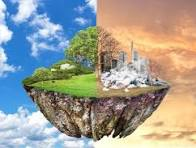

<a id="contents"></a>
# <p style="background-color: #265576; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Table Of Contents</p>

- <a href="#intro">1. Introduction</a>  
- <a href="#libraries">2. Installing Required Libraries</a>
- <a href="#data">3. Reading and Understanding our Data</a>
- <a href="#clean">4. Data Cleaning</a>
    - <a href="#dup">4.1. Drop duplicates</a>
    - <a href="#error">4.2. Fix error in HeartRate column</a>
- <a href="#Clustering">5.Clustering</a>
- <a href="#eda">6. Exploratory Data Analysis</a>   
    - <a href="#Descriptive">6.1.Descriptive Statistics</a>
    - <a href="#visualization">6.2. Visualization</a>

<a id="intro"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1. Introduction</p>

2024 was the first calendar year to be more than 1.5°C above the pre-industrial era, with a global mean near-surface temperature of 1.55 ± 0.13 °C above the 1850-1900 average. Carbon dioxide emissions from fossil fuels and industry increased to 38.2 billion tonnes in 2024, continuing to drive global warming to record levels despite urgent climate action needs.

<a id="libraries"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">2. Installing Required Libraries</p>

For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for managing the data.
 - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
  - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) and [`xgboost`](https://xgboost.readthedocs.io/en/stable/) for machine learning and machine-learning-pipeline related functions.
  - [`scipy`](https://scipy.org/) for statistical computations.
  - [`statsmodels`](https://www.statsmodels.org/stable/index.html) for statistical modeling and hypothesis testing.

In [ ]:
!pip install geopandas


In [8]:
# Packages
# Data Processing
import geopandas as gpd
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import seaborn as sns
import geopandas as gpd

# Statistics
import math
from scipy import stats
from scipy.stats import norm
from sklearn.cluster import KMeans
# File Path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/climate-change-indicators/climate_change_indicators.csv


In [9]:
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [10]:
# setting
path_root = "/kaggle/input/"
seed = 394

In [11]:
# pandas display setting
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 200)

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="data"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">3. Reading and Understanding our Data</p>

Let's read the data into pandas data frame and look at the first 5 rows.

In [12]:
df_climate = pd.read_csv(path_root + "climate-change-indicators/climate_change_indicators.csv")

<a id="clean"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">4. Data Cleaning</p>

In [13]:
# subsetting
df_climate = df_climate[[
#     'ObjectId',
    'Country',
#     'ISO2',
    'ISO3',
#     'Indicator', 'Unit', 'Source',
#     'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor',
    'F1961', 'F1962',
    'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
    'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
    'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
    'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
    'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
    'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
    'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
    'F2019', 'F2020', 'F2021', 'F2022'
]].copy()

In [43]:
df_climate.head()

,Country,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,F1971,F1972,F1973,F1974,F1975,F1976,F1977,F1978,F1979,F1980,F1981,F1982,F1983,F1984,F1985,F1986,F1987,F1988,F1989,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,0.619,-1.124,0.232,-0.489,-0.445,-0.286,0.513,0.129,0.361,0.600,0.483,-0.346,0.164,0.145,0.283,-0.141,0.391,0.919,-0.205,0.730,-0.168,-0.294,0.220,0.430,0.359,-0.116,0.471,0.675,1.198,0.993,1.311,1.365,0.587,1.373,0.401,1.720,0.675,0.704,0.895,1.613,1.397,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,-0.195,-0.069,-0.288,-0.139,-0.211,-0.683,0.545,-0.814,0.203,-0.414,-0.351,0.173,-0.128,-0.270,-0.103,0.569,-0.106,0.370,-0.066,0.795,-0.269,0.106,0.076,1.330,-0.172,-0.038,0.075,0.795,0.670,1.065,1.532,0.492,0.970,0.444,0.189,0.345,1.316,0.978,0.910,1.191,1.055,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,-0.385,-0.348,-0.015,-0.503,-0.539,-0.782,0.504,0.012,0.654,0.232,0.215,0.399,0.560,-0.004,0.508,0.296,0.975,1.304,0.386,1.266,0.031,-0.312,0.552,0.732,0.595,0.846,1.059,1.109,1.476,0.820,1.856,1.258,1.585,0.988,1.264,1.395,1.220,1.185,0.945,2.265,1.398,1.147,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,-0.477,-0.067,0.330,-0.308,-0.118,-0.177,0.156,0.092,0.341,0.350,0.179,0.280,0.313,0.277,0.256,0.394,0.354,0.509,0.143,0.497,0.641,0.344,-0.069,0.189,0.755,0.784,NaN,NaN,0.242,0.626,0.904,1.152,0.716,0.191,0.801,0.403,1.032,0.670,NaN,1.311,0.854,0.924,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",AND,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,-0.326,-0.499,0.025,-0.371,0.246,-0.045,-0.093,-0.163,0.058,-0.188,0.178,1.044,0.859,-0.157,0.059,0.387,0.397,0.883,1.162,1.736,0.231,0.386,0.174,1.508,1.279,0.570,1.788,1.018,1.055,1.050,1.480,0.835,1.949,0.936,0.851,1.485,1.024,0.946,1.413,0.471,1.677,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


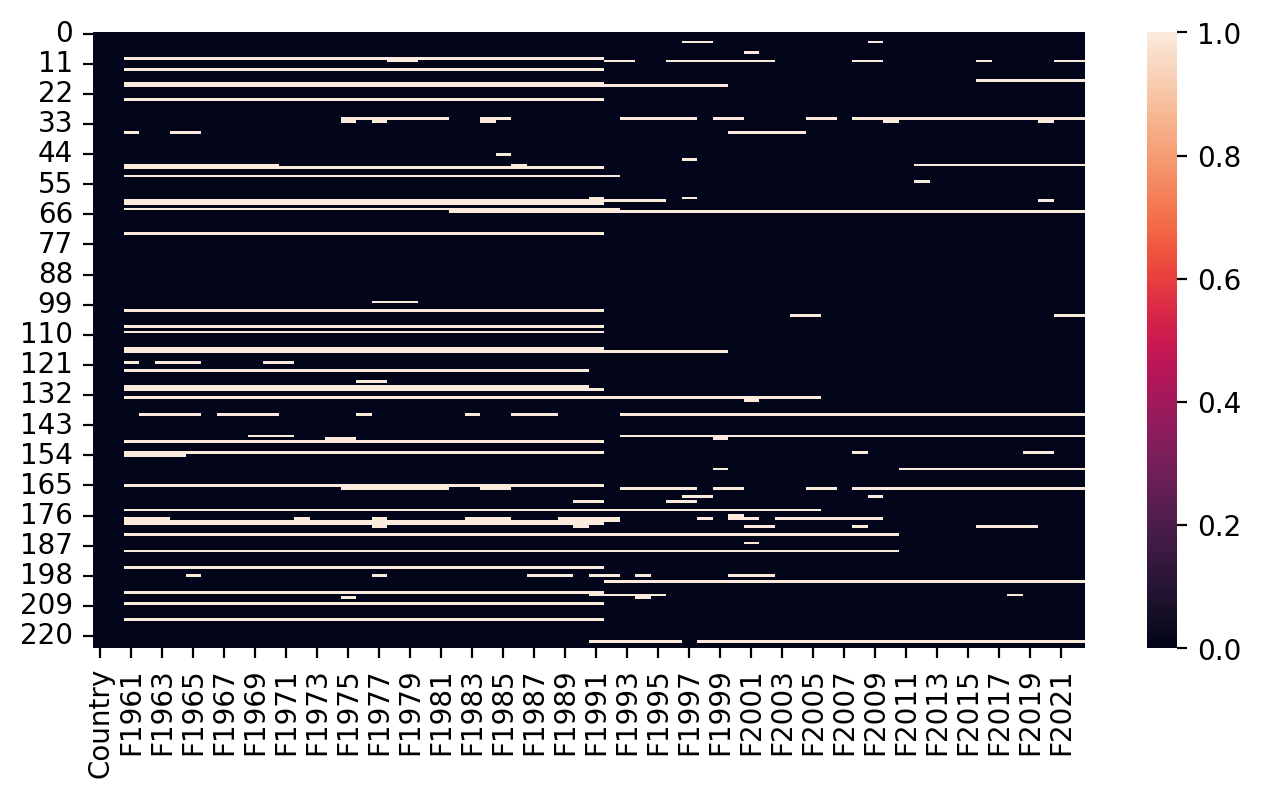

In [14]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.heatmap(
    df_climate.isnull(), vmin = 0, vmax = 1
)

plt.show()

In [15]:
df_climate.isnull().sum()[[
    'F1990', 'F1991', 'F1992', 'F1993'
]]

,0
F1990,36
F1991,37
F1992,17
F1993,16


There is a significant difference in the number of missing rows around 1992.

In [16]:
df_climate_dim = df_climate[[
    'Country', 'ISO3',
    'F1992', 'F2002', 'F2012', 'F2022'
]]
df_climate_dim.head()

,Country,ISO3,F1992,F2002,F2012,F2022
0,"Afghanistan, Islamic Rep. of",AFG,-0.294,1.365,0.223,2.012
1,Albania,ALB,0.106,0.492,1.487,1.518
2,Algeria,DZA,-0.312,1.258,1.147,1.688
3,American Samoa,ASM,0.344,1.152,0.924,1.256
4,"Andorra, Principality of",AND,0.386,0.835,1.265,3.243


In [ ]:
df_climate_dim = df_climate_dim.dropna().reset_index(drop = True).copy()

<a id="Clustering"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">5.Clustering </p>

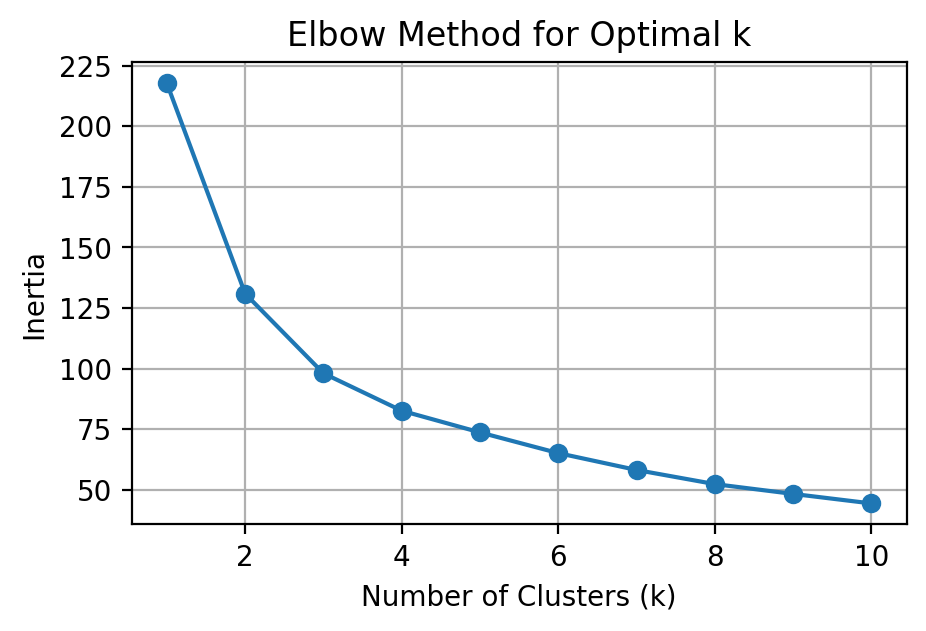

In [19]:
# select the columns for clustering
X = df_climate_dim.iloc[:, 2:]

# list to store the inertia values
list_inertia = []

# range of cluster numbers
k_range = range(1, 11)

# calculate inertia
for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 84)
    kmeans.fit(X)
    list_inertia.append(kmeans.inertia_)

# plotting
plt.figure(figsize = (5, 3), facecolor = "white")
plt.plot(k_range, list_inertia, marker = 'o', linestyle = '-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [20]:
n_clusters = 3

# clustering
kmeans = KMeans(n_clusters = n_clusters, n_init = 10, random_state = 84)
df_climate_dim['Cluster'] = kmeans.fit_predict(X)

# Display the clustered data
display(df_climate_dim)

,Country,ISO3,F1992,F2002,F2012,F2022,Cluster
0,"Afghanistan, Islamic Rep. of",AFG,-0.294,1.365,0.223,2.012,0
1,Albania,ALB,0.106,0.492,1.487,1.518,1
2,Algeria,DZA,-0.312,1.258,1.147,1.688,0
3,American Samoa,ASM,0.344,1.152,0.924,1.256,1
4,"Andorra, Principality of",AND,0.386,0.835,1.265,3.243,2
...,...,...,...,...,...,...,...
192,West Bank and Gaza,PSE,-1.045,0.728,1.043,1.074,0
193,Western Sahara,ESH,0.529,1.249,1.344,1.970,2
194,World,WLD,0.184,1.021,1.074,1.394,1
195,Zambia,ZMB,0.544,0.711,0.972,0.686,1


<a id="eda"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">6. Exploratory Data Analysis </p>

<a id="Descriptive"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">6.1.Descriptive Statistics </p>

In [21]:
df_climate_dim['Cluster'].value_counts()

,count
Cluster,
1,125
2,48
0,24


In [23]:
# table
df_cluster_stats = df_climate_dim.groupby('Cluster').agg({
    'F1992': ['mean', 'std', 'min', 'max'],
    'F2002': ['mean', 'std', 'min', 'max'],
    'F2012': ['mean', 'std', 'min', 'max'],
    'F2022': ['mean', 'std', 'min', 'max']
}).round(3)
display(df_cluster_stats.T)

Cluster         0      1      2
F1992 mean -0.798  0.262  0.705
      std   0.384  0.350  0.457
      min  -1.344 -0.716 -0.059
      max   0.100  1.147  1.601
F2002 mean  1.039  0.740  1.332
      std   0.404  0.224  0.352
      min   0.009  0.017  0.681
      max   1.716  1.380  2.255
F2012 mean  1.178  0.672  1.314
      std   0.459  0.251  0.428
      min  -0.032 -0.128  0.230
      max   2.144  1.487  2.089
F2022 mean  1.636  0.991  2.218
      std   0.415  0.427  0.356
      min   1.040 -1.305  1.405
      max   2.370  1.840  3.243

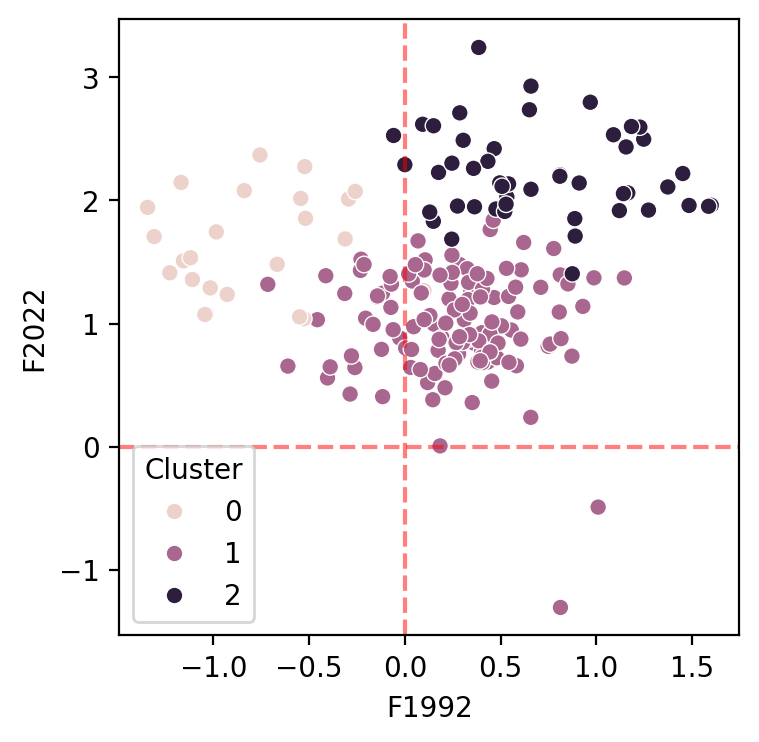

In [24]:
# scatterplot
plt.figure(figsize = (4, 4), facecolor = "white")
sns.scatterplot(
    data = df_climate_dim,
    x = 'F1992', y = 'F2022',
    hue = 'Cluster'
)
plt.axhline(
    0, 0, 1,
    color = "red", linestyle = "--", alpha = 0.5
)
plt.axvline(
    0, 0, 1,
    color = "red", linestyle = "--", alpha = 0.5
)
plt.show()

<a id="visualization"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">6.2. Visualization </p>

In [44]:

# Load from Natural Earth S3 (faster)
df_world = gpd.read_file('https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip')

# Create the ISO3 column from ISO_A3 (column name in Natural Earth)
df_world['ISO3'] = df_world['ISO_A3']

# Merge with climate data while preserving the GeoDataFrame
df_world = df_world.merge(df_climate_dim, on='ISO3', how='left')

# Display the first rows
df_world.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,ISO3,Country,F1992,F2002,F2012,F2022,Cluster
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",FJI,"Fiji, Rep. of",0.039,0.720,0.589,1.346,1.0
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",TZA,"Tanzania, United Rep. of",0.338,0.646,0.820,0.911,1.0
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi A

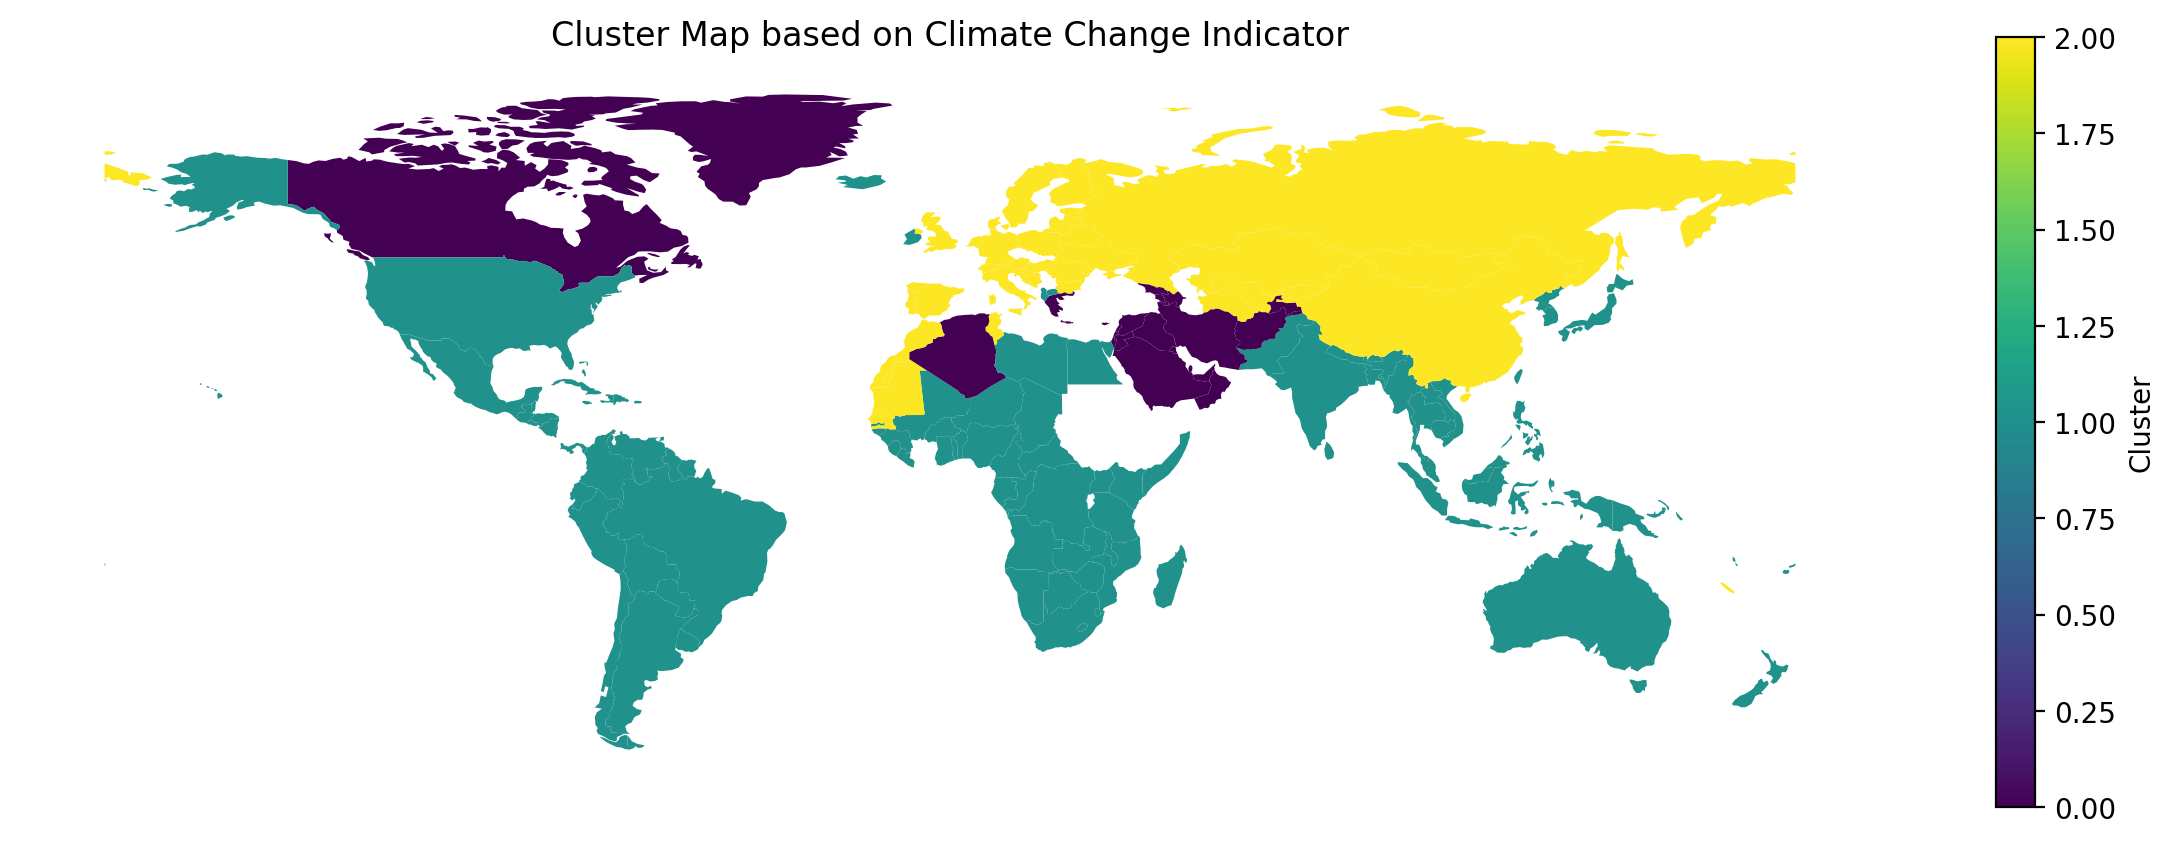

In [41]:
fig, ax = plt.subplots(figsize = (15, 5), facecolor = "white")
df_world.plot(
    column = df_world['Cluster'], ax = ax,
    legend = True,
    legend_kwds = {
        'label': "Cluster"
    }
)
ax.set_axis_off()
ax.set_title("Cluster Map based on Climate Change Indicator")
plt.show()


### Cluster 0:  
In 1992, these countries showed a decrease, while in 2022, they exhibited moderate increases.  
Primarily countries in Central Asia and the Arab region.

In [35]:
print(list(df_climate_dim.query("Cluster == 0")['Country']))

['Afghanistan, Islamic Rep. of', 'Algeria', 'Armenia, Rep. of', 'Azerbaijan, Rep. of', 'Bahrain, Kingdom of', 'Canada', 'Cyprus', 'Georgia', 'Greece', 'Greenland', 'Iran, Islamic Rep. of', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saint Pierre and Miquelon', 'Saudi Arabia', 'Syrian Arab Rep.', 'Tajikistan, Rep. of', 'United Arab Emirates', 'West Bank and Gaza']


### Cluster 2:  
In 1992, these countries showed a increase, and in 2022, they experienced substantial rises.  
Primarily countries in Europe.

In [36]:
print(list(df_climate_dim.query("Cluster == 2")['Country']))

['Andorra, Principality of', 'Austria', 'Belarus, Rep. of', 'Bosnia and Herzegovina', 'Bulgaria', 'Cabo Verde', 'China, P.R.: Mainland', 'Croatia, Rep. of', 'Denmark', 'Estonia, Rep. of', 'Finland', 'France', 'Germany', 'Gibraltar', 'Holy See', 'Hungary', 'Italy', 'Kazakhstan, Rep. of', 'Kyrgyz Rep.', 'Latvia', 'Liechtenstein', 'Lithuania', 'Malta', 'Mauritania, Islamic Rep. of', 'Moldova, Rep. of', 'Monaco', 'Mongolia', 'Morocco', 'Netherlands, The', 'New Caledonia', 'Norway', 'Poland, Rep. of', 'Portugal', 'Romania', 'Russian Federation', 'Saint Helena', 'San Marino, Rep. of', 'Senegal', 'Slovenia, Rep. of', 'Spain', 'Sweden', 'Switzerland', 'Tunisia', 'Turkmenistan', 'Ukraine', 'United Kingdom', 'Uzbekistan, Rep. of', 'Western Sahara']


### Cluster 2:  
In 1992, these countries showed a increase, and in 2022, they experienced substantial rises.  
Primarily countries in Europe.

**Conclusion**:
The clustering of countries into three groups highlights diverse trends in the observed metric from 1992 to 2022, with two groups showing distinct patterns. Countries in Central Asia and the Arab region, which experienced declines in 1992, achieved moderate increases by 2022, indicating a potential recovery or stabilization driven by regional developments. Meanwhile, European countries, which saw increases in 1992, exhibited substantial rises by 2022, likely reflecting sustained economic or environmental progress supported by effective policies. While the third cluster's trends remain unspecified, these findings underscore regional disparities and provide a basis for further exploration of the factors shaping global patterns.
